In [18]:
# load the autoreload extension for IPython
# This allows you to automatically reload modules before executing code
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import sys
import os

# Add the parent directory to the system path
sys.path.append(os.path.abspath(os.path.join('..')))

# Correlation between News Sentiment and Stock Movement
This notebook analyzes the relationship between news sentiment and stock price movements by aligning news and stock data, performing sentiment analysis, and computing correlations.

In [20]:
from scripts.correlation_analysis import CorrelationAnalyzer
from scripts.utils import load_financial_data
import pandas as pd

## 1. Load and Align Data
Load news and stock price data, and align them by date.

In [21]:
# Load Stock data
stock_prefix = 'TSLA'
stock_data = load_financial_data(stock_prefix)
# show the first 5 rows of the stock data
stock_data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0


In [22]:
# Load News data
news_data = pd.read_csv('../data/raw_analyst_ratings.csv')
# show the first 5 rows of the news data
news_data.head(5)

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [24]:
#instantiate the CorrelationAnalyzer
analyzer = CorrelationAnalyzer(news_data, stock_data, stock_prefix)

# Align the news data with the stock data by date
analyzer.align_by_date()

<string>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## 2. Sentiment Analysis on News Headlines
Use TextBlob to assign sentiment polarity to each news headline.

In [25]:
analyzer.analyze_sentiment()

## 3. Calculate Daily Stock Returns
Compute daily returns from closing prices.

In [26]:
analyzer.calculate_daily_returns()

## 4. Merge Sentiment and Returns by Date

In [27]:
merged, correlation = analyzer.merge_and_correlate()

Pearson correlation between average daily news sentiment and Tesla daily returns: -0.7258


## 6. Visualization
Visualize the relationship between sentiment and returns.

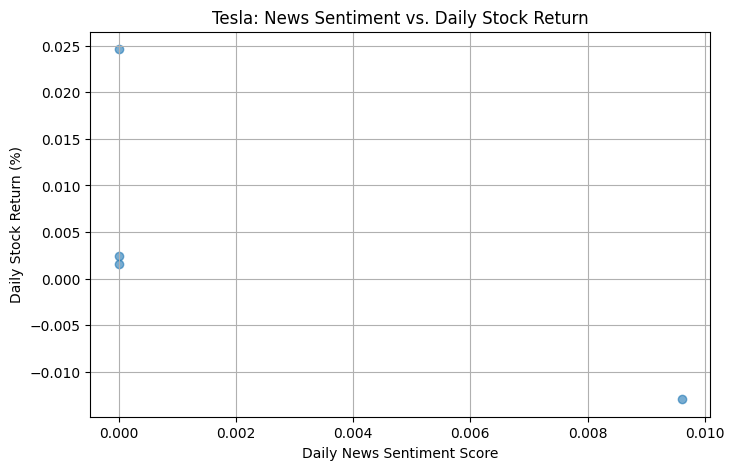

In [28]:
analyzer.plot_correlation(merged)